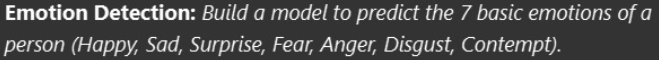

### IMPORTING LIBRARIES

In [1]:
# Tier -1 Basic Libraries 
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sn
import cv2

# Tier -2 Deep Learning Libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model as plt_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from keras.optimizers import Adam
from keras import callbacks, losses, metrics


### UPLOADING AND LABELING THE DATA

In [2]:
#Create an empty list to store the images
path = r"..................................................................................."
emotions = ["Anger","Contempt","Disgust","Fear","Happy","Sad","Surprise"]
images = []
labels = []
image_Pixel = 42


#Iterate over the emtoion directories
for label, emotion in enumerate(emotions):
    #Build the path to the directory
    directory = path + "/" + emotion + "/"
    #Load the images from the directory
    for file in os.listdir(directory):
        if file.endswith('.png'):
            #Load the image using plt.imread
            img = cv2.imread(directory + file)
            img_resize = cv2.resize(img,(image_Pixel,image_Pixel))
            labels.append(label)
            #Add the image to the images list
            images.append(img_resize)
            

Anger


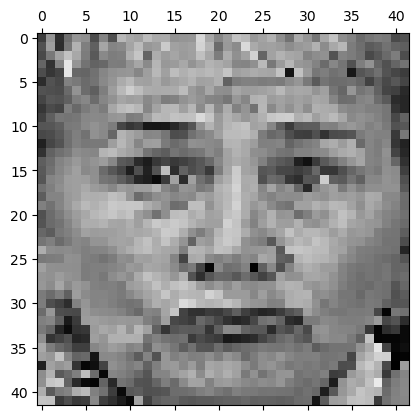

In [3]:
i=3
plt.matshow(images[i])
print(emotions[labels[i]])

### Test - Train Data Split

In [17]:
X = np.array(images)
y = np.array(labels)

In [18]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)

### Designing and Training a CNN model

In [19]:
model = Sequential()
        
#1st CNN layer
model.add(Conv2D(64,(3,3),1,padding='same',input_shape=(image_Pixel,image_Pixel,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))


#2nd CNN layer
model.add(Conv2D(128,(5,5),1,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

          
#3rd CNN layer
model.add(Conv2D(512,(3,3),1,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))
                  

model.add(Flatten())
          
# Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
          
# Fully connected 2nd Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

          
model.add(Dense(7,activation='softmax'))
          
opt = Adam(lr = 0.0001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 42, 42, 64)        1792      
                                                                 
 batch_normalization_10 (Bat  (None, 42, 42, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 42, 42, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 21, 21, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 128)      

C:\Users\KIIT\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Plotting Accuracy and Loss

Epoch 1/70
126/126 [==============================] - 70s 549ms/step - loss: 2.1048 - accuracy: 0.2280 - val_loss: 1.6995 - val_accuracy: 0.3565
Epoch 2/70
126/126 [==============================] - 84s 669ms/step - loss: 1.7703 - accuracy: 0.3568 - val_loss: 1.5743 - val_accuracy: 0.4131
Epoch 3/70
126/126 [==============================] - 80s 634ms/step - loss: 1.6960 - accuracy: 0.3864 - val_loss: 1.6139 - val_accuracy: 0.4042
Epoch 4/70
126/126 [==============================] - 84s 665ms/step - loss: 1.5910 - accuracy: 0.4132 - val_loss: 1.5136 - val_accuracy: 0.4310
Epoch 5/70
126/126 [==============================] - 82s 652ms/step - loss: 1.5063 - accuracy: 0.4475 - val_loss: 1.5327 - val_accuracy: 0.4528
Epoch 6/70
126/126 [==============================] - 85s 673ms/step - loss: 1.4625 - accuracy: 0.4592 - val_loss: 1.3918 - val_accuracy: 0.4816
Epoch 7/70
126/126 [==============================] - 79s 629ms/step - loss: 1.4187 - accuracy: 0.4706 - val_loss: 1.3800 - val_ac

126/126 [==============================] - 97s 773ms/step - loss: 0.1781 - accuracy: 0.9419 - val_loss: 1.7605 - val_accuracy: 0.5631
Epoch 58/70
126/126 [==============================] - 94s 748ms/step - loss: 0.1807 - accuracy: 0.9399 - val_loss: 1.7454 - val_accuracy: 0.5929
Epoch 59/70
126/126 [==============================] - 91s 721ms/step - loss: 0.1637 - accuracy: 0.9434 - val_loss: 1.7720 - val_accuracy: 0.5899
Epoch 60/70
126/126 [==============================] - 96s 759ms/step - loss: 0.1532 - accuracy: 0.9528 - val_loss: 1.7515 - val_accuracy: 0.5700
Epoch 61/70
126/126 [==============================] - 99s 790ms/step - loss: 0.1556 - accuracy: 0.9481 - val_loss: 1.8549 - val_accuracy: 0.5581
Epoch 62/70
126/126 [==============================] - 100s 793ms/step - loss: 0.1609 - accuracy: 0.9439 - val_loss: 1.8496 - val_accuracy: 0.5680
Epoch 63/70
126/126 [==============================] - 96s 764ms/step - loss: 0.1607 - accuracy: 0.9491 - val_loss: 1.8478 - val_accura

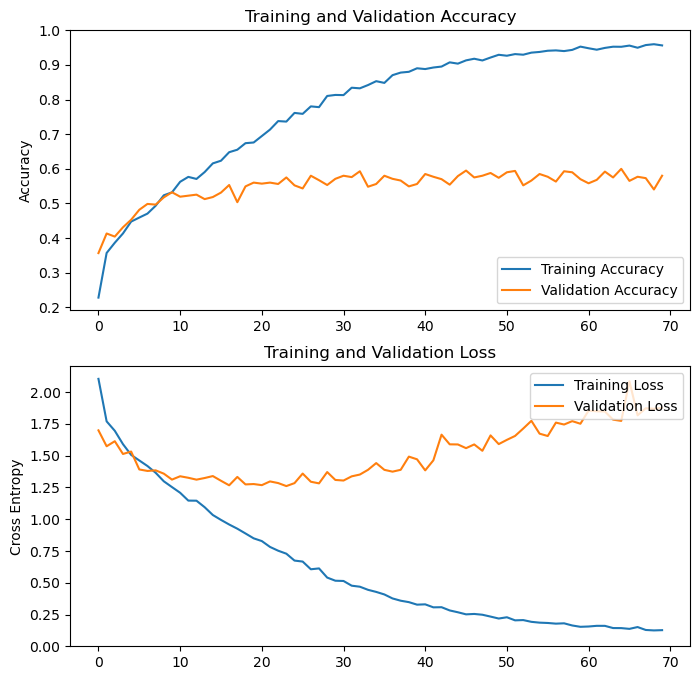

In [20]:
# Get the training history
history = model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test))


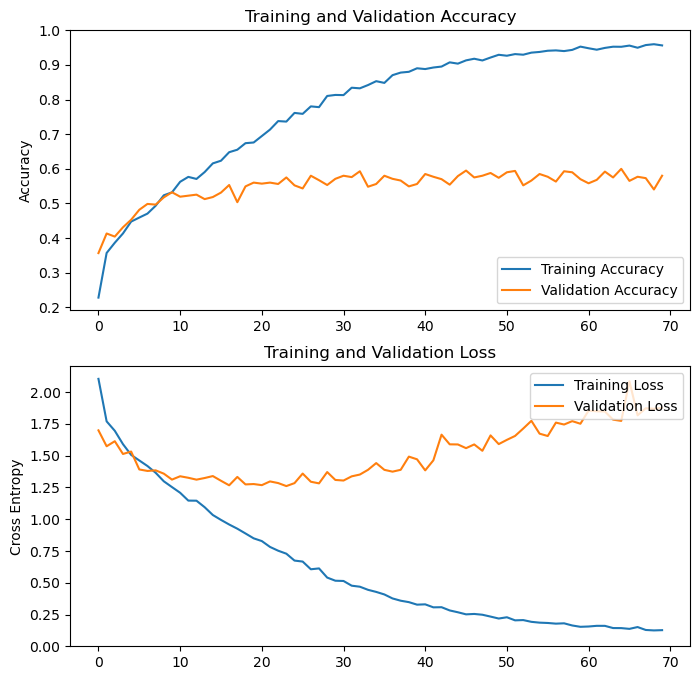

In [22]:
# Extract the accuracy and loss values
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot the accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()